In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy as sci
import json

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
rc('text', usetex=True)

# Primera medición de las cuadraturas del estado coherente

In [328]:
j = 1
Sets = ["Void", "Coherent_I", "Coherent_II", "Coherent_III"]
Limits = [(145, 155), (156, 167), (168, 179), (180, 192)]
number_file_start = Limits[j][0]
number_file_finish = Limits[j][1]

In [329]:
V_init = 57.11 
V_finish = 58.83
Delta_V = V_finish - V_init
alpha = Delta_V/2*np.pi
alpha

2.70176968208722

Aquí, dado que $\Delta V = 2\pi\alpha $ donde $\alpha$ es una constante de proporcionalidad que pasa de grados a volts.

In [330]:
recorrido_number_file_names = range(number_file_start, number_file_finish + 1)
lista_datos = [None]*len(recorrido_number_file_names)
recorrido_number_file_names

range(156, 168)

In [331]:
def Gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

index_lista_datos = 0
voltajes_tomados = np.array(range(0, number_file_finish-number_file_start+1))*0.17
theta_tomados = voltajes_tomados*alpha

quadrature = [None]*len(recorrido_number_file_names)
standard_dev = [None]*len(recorrido_number_file_names)
marginals = [None]*len(recorrido_number_file_names)
gaussianas = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    file_name = "tek0%sCH1.csv"%(i)
    try:
        lista_datos[index_lista_datos] = pd.read_csv("Datos/{}/{}".format(Sets[j], file_name), skiprows=20)
        quadrature[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].mean()
        standard_dev[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].std()
        marginals[index_lista_datos] = np.histogram(lista_datos[index_lista_datos]["CH1"],bins=13)

        parameters = curve_fit(Gaussian,marginals[index_lista_datos][1][1::],marginals[index_lista_datos][0])
        gaussianas[index_lista_datos] = parameters[0]
    except ValueError:
        print("Ocurrió un error, analizar la iteración con el documento: {}".format(file_name))
    
    index_lista_datos+=1

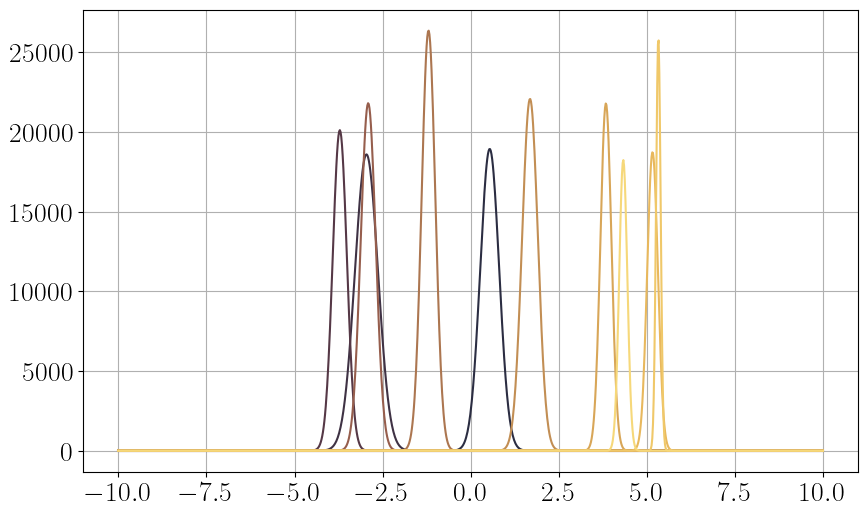

In [332]:
fig, ax = plt.subplots(figsize=(10,6))
x_linspace_marginal = np.linspace(-10,10,1000)
colors = ["#2B2D42", "#3F3244", "#553846", "#6A3F48", "#80464A", 
          "#965E4D", "#AC7650", "#C28E54", "#D8A658", "#E8B85D", 
          "#F0C869", "#F6D87A", "#FAE78D", "#FCEF9F", "#FFF7B2"]


plt.grid(True)
for i in range(0, len(gaussianas)):
    try:
        plt.plot(x_linspace_marginal,Gaussian(x_linspace_marginal,gaussianas[i][0],gaussianas[i][1],gaussianas[i][2]), color = colors[i])
    except TypeError:
        print("Ocurrió un error al analizar el componente de la iteración {}.".format(i))
        None

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
index_lista_datos = 0
marginales_plot = np.array([None]*len(recorrido_number_file_names))
pr = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    try:
        pr[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2]).tolist()
        marginales_plot[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2])
        if j==0:
            marginales_plot[5] = Gaussian(x_linspace_marginal,gaussianas[5][0]*10,0.01,.01)
            marginales_plot[7] = Gaussian(x_linspace_marginal,gaussianas[7][0]*10,0.01,.01)
            marginales_plot[8] = Gaussian(x_linspace_marginal,gaussianas[8][0]*10,0.01,.01)
            pr[5] = Gaussian(x_linspace_marginal,gaussianas[5][0],0.01,0.01).tolist()
            pr[7] = Gaussian(x_linspace_marginal,gaussianas[7][0],0.01,0.01).tolist()
            pr[8] = Gaussian(x_linspace_marginal,gaussianas[8][0],0.01,0.01).tolist()

            
        ax.plot(x_linspace_marginal, theta_tomados[index_lista_datos]*np.ones_like(x_linspace_marginal), marginales_plot[index_lista_datos], color = "#3784da")
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$\theta$")
        ax.set_zlabel(r"pr$(x,\theta)$")
        plt.savefig("marginals_%s.png"%(Sets[j]))
        index_lista_datos += 1
    except TypeError:
        None




In [213]:
x = x_linspace_marginal.tolist()
phi = theta_tomados.tolist()

In [199]:
nombre_archivo = "{}.json".format(Sets[j])

datos = {
    "phi": phi,
    "x": x,
    "pr": pr
}

with open(nombre_archivo, "w", encoding="utf-8") as archivo:
    json.dump(datos, archivo, indent=2)

print(f"Archivo '{nombre_archivo}' creado exitosamente.")


Archivo 'Void.json' creado exitosamente.


In [200]:
voltajes_tomados*alpha

array([0.        , 0.45930085, 0.91860169, 1.37790254, 1.83720338,
       2.29650423, 2.75580508, 3.21510592, 3.67440677, 4.13370761,
       4.59300846])

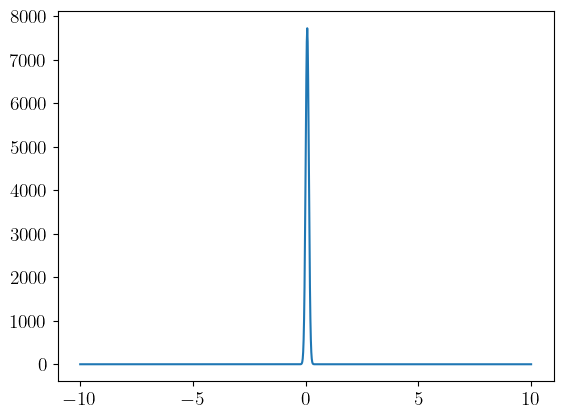

In [201]:
plt.plot(x_linspace_marginal,Gaussian(x_linspace_marginal,gaussianas[5][0],0.07,0.07))

In [202]:
gaussianas[4][0],gaussianas[4][1],gaussianas[4][2]

(87517.95475862685, 0.07352676546511133, 0.007352627829818892)

In [203]:
gaussianas[5][0],0,gaussianas[5][2]

(7725.3954565094455, 0, 2210.4147510766757)

In [204]:
marginals[5]

(array([    9,    33,    98,   172,   576, 14127, 76934,  7510,   332,
          106,    59,    34,    10], dtype=int64),
 array([-0.026     , -0.01184615,  0.00230769,  0.01646154,  0.03061538,
         0.04476923,  0.05892308,  0.07307692,  0.08723077,  0.10138462,
         0.11553846,  0.12969231,  0.14384615,  0.158     ]))

In [205]:
file_Sets = ["tom_Void.json", "tom_Coherent_I.json", "tom_Coherent_III.json"]
datos = [None]*3

index = 0
for file in file_Sets:
    with open(file) as json_file:
        datos[index] = json.load(json_file)
    index+=1


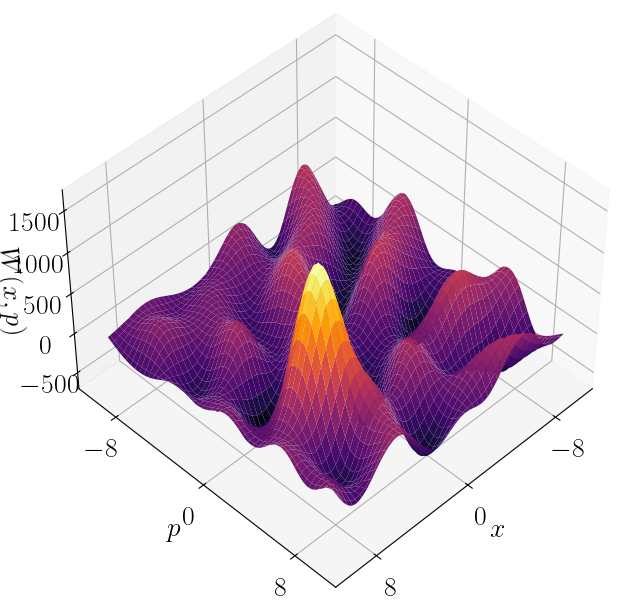

In [325]:
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,6),layout="constrained")

for i in range(3):
    ax1.clear()
    ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    X,P = np.meshgrid(datos[i]["X"],datos[i]["Y"])
    ax1.view_init(elev=45,azim=45)
    ax1.plot_surface(X,P,np.array(datos[i]["W"]),cmap="inferno")
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$p$")
    ax1.set_zlabel(r"$W(x,p)$")
    plt.savefig("Wigner_%s.png"%(file_Sets[i]))

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,10))

for i in range(3):
    ax1.clear()
    X,P = np.meshgrid(datos[i]["X"],datos[i]["Y"])
    ax1.contourf(X,P,np.array(datos[i]["W"]),cmap="inferno")
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$p$")
    plt.savefig("contour_Wigner_%s.png"%(file_Sets[i]))